##Problem 2: LEARNING TO IMPLEMENT NEURAL NETWORK FROM SCRATCH(WITHOUT KERAS)

##IMPORTING DEPENDENCIES

In [ ]:
from google.colab import drive

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


##Importing Datasets 





1.  Importing the Datasets from G-Drive






2.  Unzipping the data from the folders.


3.  Fetching the data from train path and storing them in the train array 



4.  Fetching the data from valid path and storing them in the test array 








In [3]:
#Creating a class Data_Image and building different methods within the class to perform various operations.


class Image_data:

     #Initializing the rootpath and train and test in init method
    def __init__(self, root_path):
        self.root_path = root_path
        self.train_X = None
        self.train_Y = None
        self.test_X = None
        self.test_Y = None

     
     #Passing the Image path and converting them to array and flattening the returned value
    def image_to_array(self, path):
        img = Image.open(path)
        data = np.asarray(img).astype(int)
        return data.flatten()

    
    # Function shuffles the elements in lists x and y randomly and returns a list of paired elements in the new randomized order.
     
    def data_shuffle(self, x, y):
        zipped_list = list(zip(x, y))
        random.shuffle(zipped_list)
        return list(zip(*zipped_list))


     # Function data_processing reads and processes image data from a root directory path
     # shuffles the training data
     # returns the processed data as train/test feature and target arrays.

    def data_processing(self):
        root_path = self.root_path
        train_X, test_X, train_Y, test_Y = [], [], [], []
        for i in os.listdir(root_path):
            path = root_path + '/' + i
            if not os.path.isdir(path):
                continue
            print('reading files in ' + i)
            data_X = []
            data_Y = []
            for j in os.listdir(path):
                print('reading files in ' + j)
                new_path = path + '/' + j
                for k in os.listdir(new_path):
                    # print('reading file '+k)
                    data_X.append(self.image_to_array(new_path + '/' + k))
                    data_Y.append(int(j))
            if i == 'train':
                self.train_X = np.array(data_X)
                self.train_Y = np.array(data_Y)
                print('shuffling train data')
                self.train_X, self.train_Y = self.data_shuffle(self.train_X, self.train_Y)
                self.train_X = np.array(self.train_X).T
                self.train_Y = np.array(self.train_Y)
            else:
                self.test_X = np.array(data_X).T
                self.test_Y = np.array(data_Y)

        return self.train_X, self.train_Y, self.test_X, self.test_Y

In [ ]:
# create an instance of the Data_Image class
data = Image_data('/content/drive/MyDrive/GurNum')


X_train, Y_train, X_test, Y_test = data.data_processing()



reading files in train
reading files in 8
reading files in 1
reading files in 7
reading files in 0
reading files in 3
reading files in 9
reading files in 2
reading files in 5
reading files in 4
reading files in 6
shuffling train data
reading files in val
reading files in 4
reading files in 7
reading files in 2
reading files in 3
reading files in 1
reading files in 0
reading files in 6
reading files in 8
reading files in 5
reading files in 9


#Printing the Shapes of Training and Testing Dataset

In [ ]:

print('X_train shape:',  X_train.shape)
print('Y_train shape:', Y_train.reshape(1, -1).shape)

print('X_test shape:',  X_test.shape)
print('Y_test shape:', Y_test.reshape(1, -1).shape)

X_train shape: (1024, 1000)
Y_train shape: (1, 1000)
X_test shape: (1024, 178)
Y_test shape: (1, 178)


Label 5


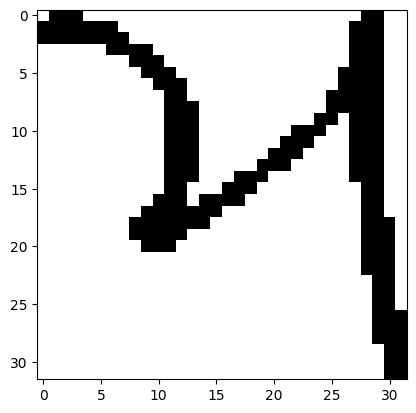

In [ ]:
#Displaying a random image of training data along with its label

index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(32, 32), cmap = 'gray')
print('Label',Y_train[index])
plt.show()

##BUILDING THE NEURAL NETWORK FROM SCRATCH USING GRADIENT DESCENT ALGORITHM

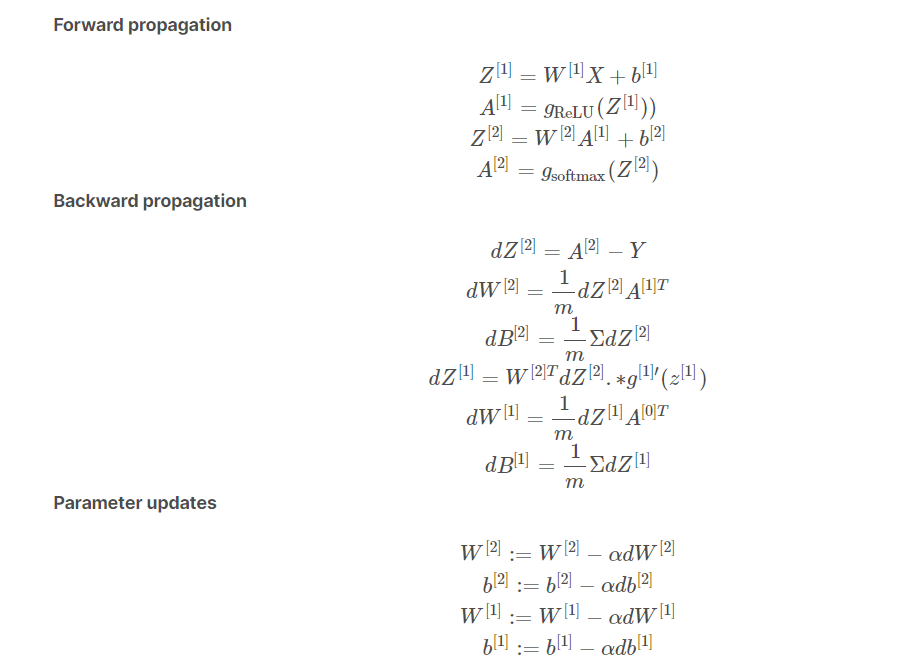





In [6]:
#Function to initialize Weights and Bias

#init_params: initializes the weights and biases for a neural network
def init_params():
    W1 = np.random.rand(10, 1024) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#ReLU: computes the Rectified Linear Unit activation function
def ReLU(Z):
    return np.maximum(Z, 0)

#softmax: computes the softmax activation function

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
#forward_prop: performs forward propagation through a neural network .
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#ReLU_deriv: computes the derivative of the ReLU activation function

def ReLU_deriv(Z):
    return Z > 0

#one_hot: converts class labels to one-hot encoded vectors
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#backward_prop: performs backpropagation through a neural network

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#update_params: updates the weights and biases of a neural network using gradient descent

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

#Applying the Predictions and calculating the accuracy

In [ ]:
# function returns the predicted class labels for a given set of activation values by taking the index of the maximum value along the first axis.

def get_predictions(A2):
    return np.argmax(A2, 0)

#computes the accuracy of a set of predictions by comparing them to the true class labels and returning the proportion of correct predictions.

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# performs gradient descent to train a neural network and returns the updated parameters and losses over iterations.

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    losses = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        loss = np.sum(-one_hot(Y) * np.log(A2)) / Y.size
        losses.append(loss)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, losses

In [ ]:
#applies gradient descent on the training data (X_train and Y_train) 
#learning rate of 0.10 
#1000 iterations

W1, b1, W2, b2 ,losses= gradient_descent(X_train, Y_train, 0.10, 1000)


Streaming output truncated to the last 5000 lines.
 2 6 5 8 4 0 6 7 8 1 9 4 0 3 9 5 4 5 3 0 6 3 8 5 3 1 9 0 1 2 6 9 6 6 3 9 2
 5 0 6 9 3 2 1 5 0 1 7 5 0 2 0 4 3 7 9 6 9 4 7 0 5 4 3 3 4 9 5 5 0 3 7 7 9
 6 4 6 8 9 0 1 1 3 4 3 0 2 5 2 0 2 4 9 3 3 8 0 7 3 7 1 9 6 2 3 1 4 8 9 3 0
 4 9 6 4 8 3 1 5 9 8 8 7 1 9 5 8 3 4 0 2 1 8 9 2 5 6 4 8 7 1 5 4 5 9 1 8 8
 0 3 3 3 0 6 8 4 3 2 3 0 4 4 6 7 2 7 3 5 9 3 4 4 9 3 7 4 3 2 5 8 0 7 3 3 9
 3 4 4 8 8 3 8 4 3 9 7 3 9 1 5 7 4 1 9 5 7 7 4 3 4 8 3 2 8 5 3 5 3 8 9 9 1
 7 1 9 4 5 8 4 8 3 4 0 3 2 7 9 3 4 9 8 4 3 0 9 8 0 5 8 3 0 5 7 2 5 5 4 4 4
 9 0 0 8 3 6 6 4 3 9 6 3 5 9 9 9 9 5 2 6 2 8 3 0 6 3 8 5 3 1 5 9 4 3 1 6 0
 8 2 0 1 0 5 4 9 5 9 9 9 8 2 9 4 4 7 0 3 8 2 3 9 2 4 4 3 8 0 2 6 8 8 8 5 8
 5 8 9 2 9 0 8 3 9 0 7 8 6 8 5 5 8 7 3 7 6 3 9 4 1 9 1 8 4 7 0 8 7 2 2 1 8
 3 6 4 4 3 9 8 9 9 9 4 6 3 3 3 3 4 9 9 1 8 1 3 9 4 3 7 4 2 3 4 8 5 7 7 5 3
 3 3 2 7 3 9 7 1 0 7 4 9 1 9 0 0 0 2 9 0 4 5 5 5 0 2 1 6 9 5 5 3 9 0 3 3 3
 7] [3 6 4 3 7 0 2 6 5 9 8 4 2 0 9 0 4 0 0 8 1 2 

#Accuracy of the NN Model



*   The model built from scratch using gradient descent performs well.
*   The overall accuracy of model is :

<center>
<b>
Accuracy= 0.996  i.e 99.6%</b>
</center>











#Plotting the  Loss

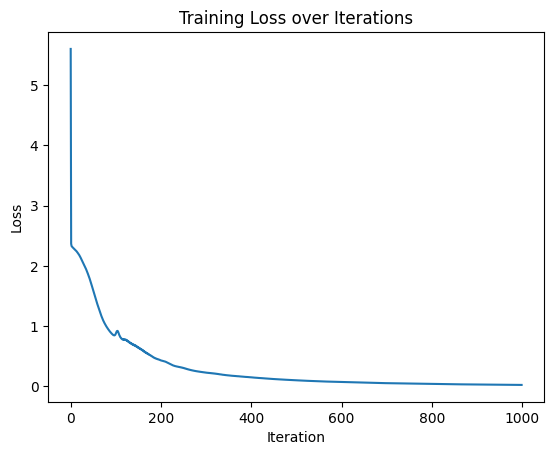

In [ ]:
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Training Loss over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

plot_losses(losses)




*  The Losses reduces gradually with training  
*   Accounting for pretty good accuracy



In [ ]:
#Function makes predictions using the trained parameters W1, b1, W2, b2 and returns the predicted classes for input X.

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

#Function to test predictions of the model on a single example image and display the image with its predicted label and true label.

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


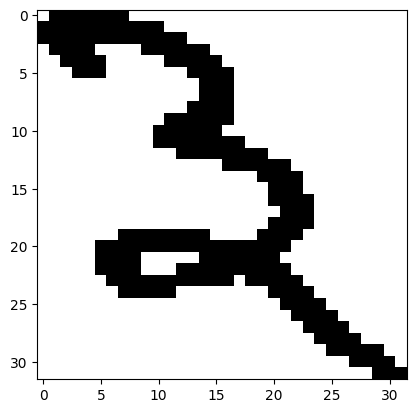

Prediction:  [6]
Label:  6


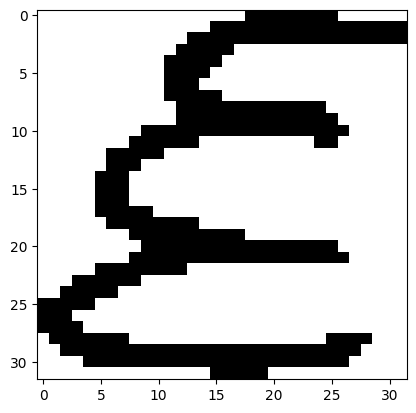

Prediction:  [4]
Label:  4


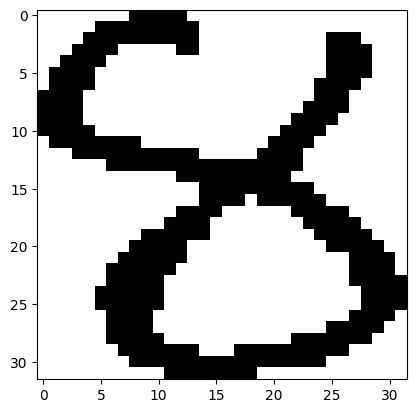

Prediction:  [3]
Label:  3


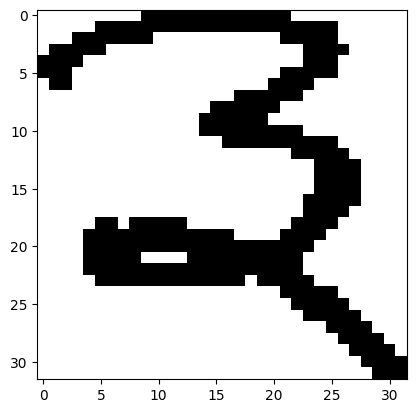

In [ ]:
#Trying out prediction on various test sample and printing their predicted and actual label

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Inference:



*   The Predicted and Actual labels of the Test set are matching.
*   The model is working good.



#Calculating the Accuracy of the Test Set

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 1 2
 4 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 1 1 1 1
 7 1 7 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9] [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


0.9382022471910112

#RESULTS:



*   The model performs good with Great accuracy on test set
*   The Accuracy of the Test set is given by :

<center>
<b>
       Accuracy of Test Set : 0.93 or 93%
</b>

</center>



##Problem 2: LEARNING TO IMPLEMENT NEURAL NETWORK FROM SCRATCH(WITH KERAS)

In [ ]:
from google.colab import drive

#Reading the Path Values

In [ ]:
train_path='/content/drive/MyDrive/GurNum/train'
valid_path='/content/drive/MyDrive/GurNum/val'

#Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import os
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
#Create Keras ImageDataGenerator objects for training and validation data with specified augmentation and image preprocessing parameters
# load the data from directories.

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)
valid_datagen=ImageDataGenerator (rescale = 1./255)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/GurNum/train',
                                              target_size = (32,32),
                                               batch_size = 32,
                                               class_mode='categorical')
validation_set=valid_datagen.flow_from_directory('/content/drive/MyDrive/GurNum/val',
                                              target_size = (32,32),
                                               batch_size = 32,
                                               class_mode='categorical')

Found 1000 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Found 178 images belonging to 10 classes.


Inference:


*   Training Set: 1000 images with 10 categories
*   Validation Set:178 images with 10 categories



#Visualizing the data 

Label: 8


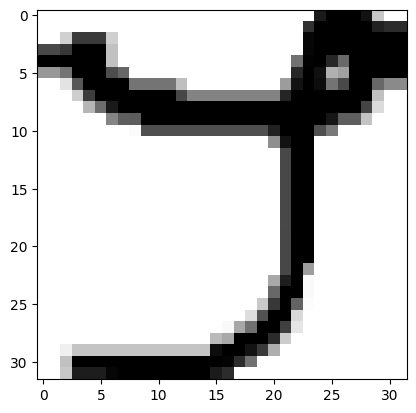

In [ ]:
# Get a batch of images and labels from the training set
x_train, y_train = next(training_set)

# Choose an image from the batch to display
img_index = 20

# Get the image and label at the chosen index
img = x_train[img_index]
label = y_train[img_index]

# Print the label
print("Label:", np.argmax(label))

# Display the image
plt.imshow(img,interpolation='nearest')
plt.show()








Label: 3


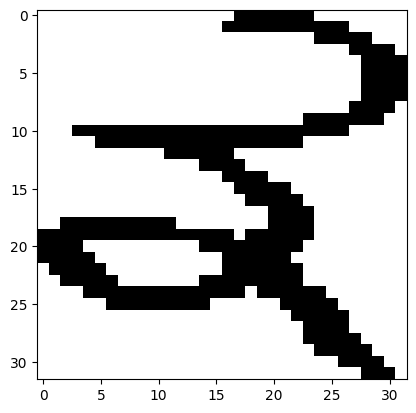

In [ ]:
# Get a batch of images and labels from the training set
x_test, y_test = next(validation_set)

# Choose an image from the batch to display
img_index = 20

# Get the image and label at the chosen index
img = x_test[img_index]
label = y_test[img_index]

# Print the label
print("Label:", np.argmax(label))

# Display the image
plt.imshow(img,interpolation='nearest')
plt.show()


#Building the Model 

In [ ]:
#A sequential model is created using the Keras API.

model = Sequential()

#Flattened Layer
model.add(Flatten(input_shape=(32,32,3)))

#Dense Layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='sigmoid',kernel_initializer='ones', bias_initializer='zeros') ) # The last layer has 10 neurons for 10 classes

#Model  compiled with the Adam optimizer and categorical cross-entropy loss function.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fit method is called on the model with the training and validation data generators, and the number of epochs is set to 20.

r=model.fit(training_set, epochs=20, validation_data=validation_set)

Epoch 1/20
32/32 [==============================] - 5s 129ms/step - loss: 2.0263 - accuracy: 0.3620 - val_loss: 1.5163 - val_accuracy: 0.4775
Epoch 2/20
32/32 [==============================] - 3s 101ms/step - loss: 1.0605 - accuracy: 0.6940 - val_loss: 0.8142 - val_accuracy: 0.7640
Epoch 3/20
32/32 [==============================] - 3s 96ms/step - loss: 0.6110 - accuracy: 0.8190 - val_loss: 0.5381 - val_accuracy: 0.8764
Epoch 4/20
32/32 [==============================] - 3s 100ms/step - loss: 0.5111 - accuracy: 0.8400 - val_loss: 0.4285 - val_accuracy: 0.8539
Epoch 5/20
32/32 [==============================] - 3s 103ms/step - loss: 0.4281 - accuracy: 0.8530 - val_loss: 0.3436 - val_accuracy: 0.9045
Epoch 6/20
32/32 [==============================] - 3s 105ms/step - loss: 0.3472 - accuracy: 0.8980 - val_loss: 0.3598 - val_accuracy: 0.8427
Epoch 7/20
32/32 [==============================] - 4s 113ms/step - loss: 0.3642 - accuracy: 0.8840 - val_loss: 0.3318 - val_accuracy: 0.8876
Epoch 8

In [ ]:
#A sequential model is created using the Keras API.

model = Sequential()

#Flattened Layer
model.add(Flatten(input_shape=(32,32,3)))

#Dense Layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='sigmoid',kernel_initializer='ones', bias_initializer='zeros') ) # The last layer has 10 neurons for 10 classes

#Model  compiled with the Adam optimizer and categorical cross-entropy loss function.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fit method is called on the model with the training and validation data generators, and the number of epochs is set to 20.

r=model.fit(training_set, epochs=20, validation_data=validation_set)

Epoch 1/20
32/32 [==============================] - 4s 114ms/step - loss: 1.7969 - accuracy: 0.4220 - val_loss: 1.1068 - val_accuracy: 0.7472
Epoch 2/20
32/32 [==============================] - 3s 95ms/step - loss: 0.7800 - accuracy: 0.7700 - val_loss: 0.6036 - val_accuracy: 0.7921
Epoch 3/20
32/32 [==============================] - 3s 108ms/step - loss: 0.4956 - accuracy: 0.8360 - val_loss: 0.5607 - val_accuracy: 0.7809
Epoch 4/20
32/32 [==============================] - 3s 103ms/step - loss: 0.4113 - accuracy: 0.8590 - val_loss: 0.4196 - val_accuracy: 0.8652
Epoch 5/20
32/32 [==============================] - 3s 97ms/step - loss: 0.3472 - accuracy: 0.8800 - val_loss: 0.4317 - val_accuracy: 0.8202
Epoch 6/20
32/32 [==============================] - 4s 110ms/step - loss: 0.3389 - accuracy: 0.8980 - val_loss: 0.3792 - val_accuracy: 0.8708
Epoch 7/20
32/32 [==============================] - 3s 96ms/step - loss: 0.2754 - accuracy: 0.9070 - val_loss: 0.4164 - val_accuracy: 0.8820
Epoch 8/2

Inference:



*   Accuracy of the Model : 95%




#Plotting the Training and Validation Losses

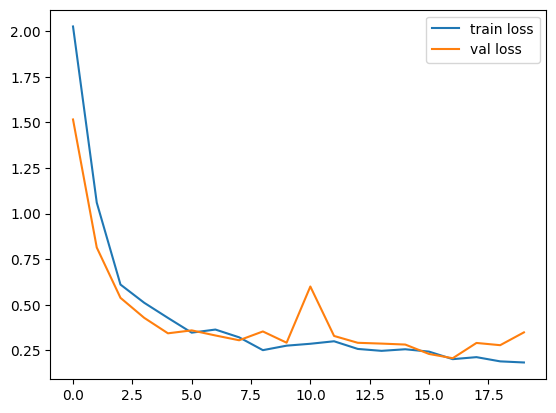

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



*   Both Training and Testing Loss reduces gradulaly.



#Plotting the Accuracies

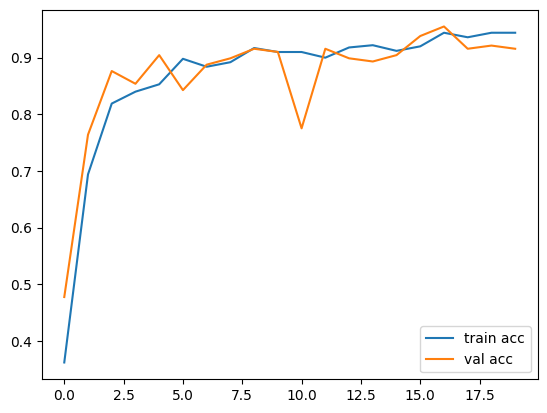

<Figure size 640x480 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Inference:



*   The Accuracies for both training and validation sets increase 




# Printing the Weights and Bias of the Model

In [ ]:
coef, intercept, *rest = model.get_weights()
coef, intercept

(array([[-0.0423272 ,  0.00208049,  0.01543453, ...,  0.0161706 ,
          0.01519505,  0.04175426],
        [ 0.00982763,  0.04558661, -0.00563654, ..., -0.02271283,
          0.02652143,  0.06578322],
        [ 0.01416672, -0.00231492,  0.0140112 , ...,  0.0049811 ,
          0.02536329,  0.00430115],
        ...,
        [-0.03352982,  0.01363823,  0.01085275, ..., -0.01521553,
          0.06663535,  0.04288275],
        [ 0.00287261, -0.01303083, -0.03735985, ...,  0.00845156,
          0.04756413, -0.01431785],
        [ 0.00225761,  0.02346993,  0.02937954, ...,  0.03212282,
          0.07543481,  0.0534714 ]], dtype=float32),
 array([-0.01872744, -0.0135754 , -0.00558601, -0.00550214, -0.00550572,
        -0.00550891, -0.00547863, -0.00613667, -0.00555504, -0.02501806,
        -0.0064695 , -0.00643579, -0.00255748,  0.00139782,  0.01030892,
        -0.00550369,  0.01671571, -0.00470471, -0.00545296,  0.00920983,
        -0.00545283,  0.0089655 , -0.00540098,  0.00666455, -0.004